## Hands-on Activity 9.2 Customized Visualizations using Seaborn

**Procedures**
- 9.4 Introduction to Seaborn
- 9.5 Formatting Plots
- 9.6 Customizing Visualizations

**Data Analysis:**
- Provide comments on output from the procedures.

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
   - Disappointing user growth announced after close on July 25, 2018
   - Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
   - FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

fb = pd.read_csv('Downloads/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
eq = pd.read_csv('Documents/Python/earthquakes.csv')

Text(0.5, 1.0, 'Correlation Heatmap: Magnitude vs Tsunami with magType of mb')

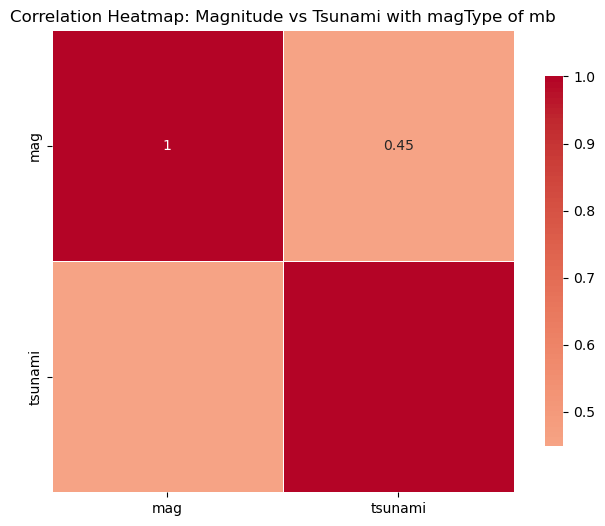

In [7]:
# 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

fig, ax = plt.subplots(figsize=(8,6))

mb_eq = eq[eq['magType'] == 'mb' ]
cor_coefficient = mb_eq[['mag','tsunami']].corr()

sns.heatmap(
    cor_coefficient,
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    square = True,
    linewidth = 0.5,
    cbar_kws = {'shrink':0.8},
    ax=ax
)

ax.set_title('Correlation Heatmap: Magnitude vs Tsunami with magType of mb')

Text(0.5, 1.0, 'Box Plot of Facebook Closing Prices')

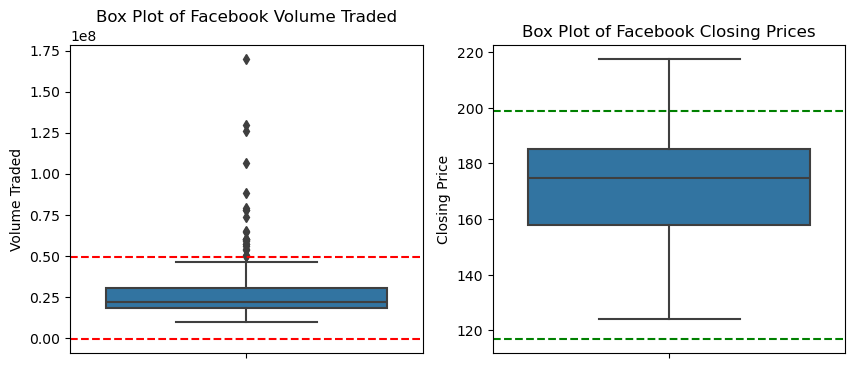

In [14]:
# 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5.
# The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier.
# (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

# q1, q3, irq calculation for volume traded
q1_vol = fb['volume'].quantile(0.25)
q3_vol = fb['volume'].quantile(0.75)
iqr_vol = q3_vol - q1_vol

# calculation for closing prices
q1_close = fb['close'].quantile(0.25)
q3_close = fb['close'].quantile(0.75)
iqr_close = q3_close - q1_close

# Tukey fence
lb_volume = q1_vol - 1.5 * iqr_vol
up_volume = q3_vol + 1.5 * iqr_vol

lb_close = q1_close - 1.5 * iqr_close
up_close = q1_close + 1.5 * iqr_close

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# for volume traded
sns.boxplot(
    y = 'volume',
    data = fb[['volume']],
    ax = axes[0]
)

axes[0].axhline(y=lb_volume, color ='red', linestyle='--', label= 'Lower Bound')
axes[0].axhline(y=up_volume, color ='red', linestyle='--', label= 'Upper Bound')
axes[0].set_ylabel('Volume Traded')
axes[0].set_title('Box Plot of Facebook Volume Traded')

# for closing prices
sns.boxplot(
    y = 'close',
    data = fb[['close']],
    ax = axes[1]
)

axes[1].axhline(y=lb_close, color ='green', linestyle='--', label= 'Lower Bound')
axes[1].axhline(y=up_close, color ='green', linestyle='--', label= 'Upper Bound')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Box Plot of Facebook Closing Prices')

Text(0.5, 1.0, 'Box Plot of Facebook Closing Prices')

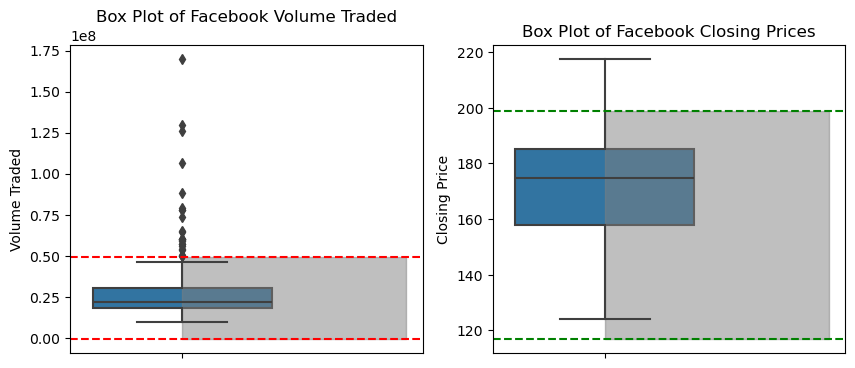

In [17]:
# 3. Fill in the area between the bounds in the plot from exercise #2.

# q1, q3, irq calculation for volume traded
q1_vol = fb['volume'].quantile(0.25)
q3_vol = fb['volume'].quantile(0.75)
iqr_vol = q3_vol - q1_vol

# calculation for closing prices
q1_close = fb['close'].quantile(0.25)
q3_close = fb['close'].quantile(0.75)
iqr_close = q3_close - q1_close

# Tukey fence
lb_volume = q1_vol - 1.5 * iqr_vol
up_volume = q3_vol + 1.5 * iqr_vol

lb_close = q1_close - 1.5 * iqr_close
up_close = q1_close + 1.5 * iqr_close

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# for volume traded
sns.boxplot(
    y = 'volume',
    data = fb[['volume']],
    ax = axes[0]
)

axes[0].axhline(y=lb_volume, color ='red', linestyle='--', label= 'Lower Bound')
axes[0].axhline(y=up_volume, color ='red', linestyle='--', label= 'Upper Bound')
axes[0].fill_between([0,1], lb_volume,up_volume, color = 'gray', alpha = 0.5) # the .fill_between fills in the area betwwen the bounds
axes[0].set_ylabel('Volume Traded')
axes[0].set_title('Box Plot of Facebook Volume Traded')

# for closing prices
sns.boxplot(
    y = 'close',
    data = fb[['close']],
    ax = axes[1]
)

axes[1].axhline(y=lb_close, color ='green', linestyle='--', label= 'Lower Bound')
axes[1].axhline(y=up_close, color ='green', linestyle='--', label= 'Upper Bound')
axes[1].fill_between([0,1], lb_close, up_close, color = 'gray', alpha = 0.5)
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Box Plot of Facebook Closing Prices')


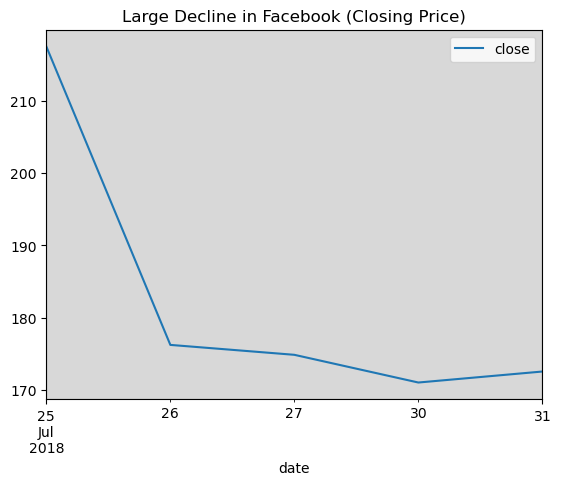

In [18]:
# 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018- 07-31', which marks the large decline in Facebook price on a line plot of the closing price.
ax = fb['2018-07-25':'2018-07-31'][['close']].plot(kind='line', title = 'Large Decline in Facebook (Closing Price)')
ax.axvspan('2018-07-25', '2018-07-31', alpha = 0.3, color='gray')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Closing Price')

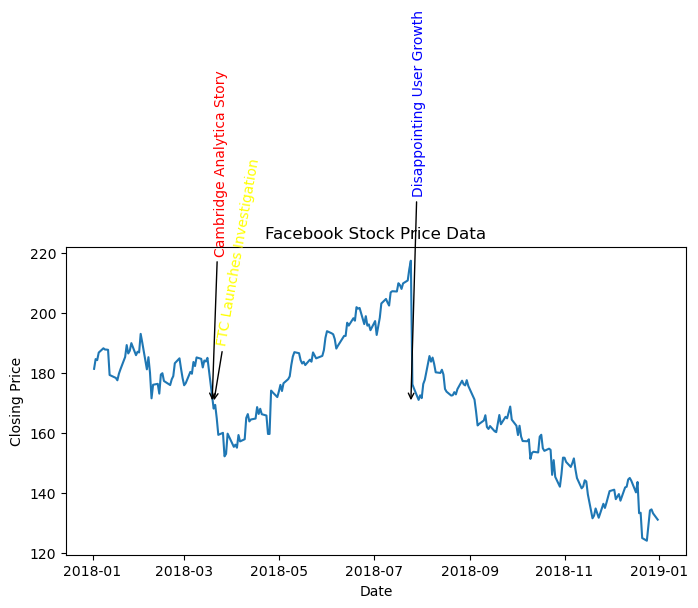

In [22]:
# 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
    # Disappointing user growth announced after close on July 25, 2018
    # Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
    # FTC launches investigation on March 20, 2018

from datetime import datetime

# Creating line plot
plt.figure(figsize=(8,4))
sns.lineplot(data=fb, x=fb.index, y= 'close')
plt.title('Facebook Stock Price Data')

# Converting string to datetime
date_format = '%Y-%m-%d'
date1 = datetime.strptime('2018-07-25', date_format)
date2 = datetime.strptime('2018-07-26', date_format)
date3 = datetime.strptime('2018-03-19', date_format)
date4 = datetime.strptime('2018-03-20', date_format)
date5 = datetime.strptime('2018-03-21', date_format)

# Annotating 
plt.annotate('Disappointing User Growth', xy=(date1,170), xytext=(date2,240),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), color='blue',rotation=90)

plt.annotate('Cambridge Analytica Story', xy=(date3,170), xytext=(date4,220),
            arrowprops=dict(facecolor='red', arrowstyle='->'), color='red',rotation=90)

plt.annotate('FTC Launches Investigation', xy=(date4,170), xytext=(date5,190),
            arrowprops=dict(facecolor='yellow', arrowstyle='->'), color='yellow',rotation=80)

plt.xlabel('Date')
plt.ylabel('Closing Price')

In [26]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

# This is the modified part of the reg_rigid_plots()

import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import random

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    number_cols = data.shape[1]
    perm_count = number_cols * (number_cols - 1)

    fig, ax = plt.subplots(perm_count, 2, figsize=(15,8))

    # Generates random number that willserve as index in the colormap list
    random_color = random.randint(0, len(colormaps)) 
    
    for (x,y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle([random_color,random_color])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

In [27]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

# This is the original code of the reg_rigid_plots()

import itertools

import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    number_cols = data.shape[1]
    perm_count = number_cols * (number_cols - 1)

    fig, ax = plt.subplots(perm_count, 2, figsize=(15,8))
    
    for (x,y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['red','orange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

# Summary and Conclusion:

In this activity, the seaborn library is introduced to us and utilize it, for me it is very confusing and having a hard time understanding how it works and read the visual representations of some data. Seaborn have a lot of similarities with matplotlib but seaborn takes minimal coding, it can provide a high-level interface for creating informative and attractive statistical graphs.

I was able to apply these functions in seaborn on our supplementary activities and while I am not sure if i did it right, i managed to somehow take a grasp and I will still study it until I understand it wholeheartedly. In conclusion, the introduction to seaborn opens up a wide variety for much more effective data handling and provides more insights in the graphs. 